# Feature Selection 

It is the technique of identifying the features which are the most important, the benefits of feature engineering are as follows - 
1. Reduces Overfitting - Less redundant data means less opportunity to make decisions based on noise 
2. Improves Accuracy - Less misleading data means modeling accuracy improves
3. Reduces Training Time - Fewer data points reduce algorithm complexity and algorithms train faster 

## Methods of Feature Selection - 
There are multiple methods of feature selection the 3 most prominent ones are discussed - 

In [1]:
# Reading the data set 
import pandas as pd 
import numpy as np 

data = pd.read_csv('train.csv')
data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


## Description of variables in the dataset 

1. battery_power: Total energy a battery can store in one time measured in mAh
2. blue: Has Bluetooth or not
3. clock_speed: the speed at which microprocessor executes instructions
4. dual_sim: Has dual sim support or not
5. fc: Front Camera megapixels
6. four_g: Has 4G or not
7. int_memory: Internal Memory in Gigabytes
8. m_dep: Mobile Depth in cm
9. mobile_wt: Weight of mobile phone
10. n_cores: Number of cores of the processor
11. pc: Primary Camera megapixels
12. px_height
13. Pixel Resolution Height
14. px_width: Pixel Resolution Width
15. ram: Random Access Memory in MegaBytes
16. sc_h: Screen Height of mobile in cm
17. sc_w: Screen Width of mobile in cm
18. talk_time: the longest time that a single battery charge will last when you are
19. three_g: Has 3G or not
11. touch_screen: Has touch screen or not
12. wifi: Has wifi or not
13. price_range: This is the target variable with a value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

In [3]:
# setting up the target variables and the independent variables 
X = data.iloc[:,0:20] # independent variables 
y = data.iloc[:,-1] # target column i.e. price range 

## Univariate Selection 
Statistical tests can be used to select those features that have the strongest relationship with the output variable 

The scikit-learn library provides the SelectKBest class that can be used with a suite of different statistical tests to select a specific number of features.

The example below uses the chi-squared (chi²) statistical test for non-negative features to select 10 of the best features from the Mobile Price Range Prediction Dataset.

In [4]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# apply selectKBest class to extract top 10 best features 
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
# Concat two dataframes for better visualization 
featuresScores = pd.concat([dfcolumns, dfscores], axis=1)
featuresScores.columns = ['Specs', 'Score'] # naming the dataFrame columns 

print(featuresScores.nlargest(10, 'Score')) #print 10 best features 

            Specs          Score
13            ram  931267.519053
11      px_height   17363.569536
0   battery_power   14129.866576
12       px_width    9810.586750
8       mobile_wt      95.972863
6      int_memory      89.839124
15           sc_w      16.480319
16      talk_time      13.236400
4              fc      10.135166
14           sc_h       9.614878


## Feature Importance 

You can get the feature importance of each feature of your dataset by using feature importance property of the model 

Feature importance gives you as score for each feature of your data, the higher the score more important or relevant is the feature towards your ouput variable 

Feature importance is an inbuilt class that comes with Tree Based Classifiers, we will be using Extra Tree Classifier for extracting the top 10 features for the dataset 

[1.01784985e-01 3.41269841e-03 7.49304029e-03 4.26666667e-03
 5.77777778e-04 1.00000000e-03 8.95694558e-03 5.90895890e-03
 2.31559794e-02 5.81485314e-03 4.74618852e-03 8.88972727e-02
 8.64051683e-02 6.40949129e-01 3.84315744e-03 7.03917033e-03
 2.69404070e-03 1.72063492e-03 6.66666667e-04 6.66666667e-04]


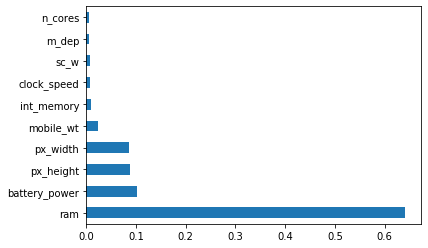

In [13]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt 

model = DecisionTreeClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

## Correlation Matrix with Heatmap

Correlation states how the features are related to each other or the target variable 

Correlation can be positive (increase in one value of feature increases the value of the target variable ) or negative (increase in one value of feature decreases the value of the target variable ) 

Heatmap makes it easy to identify which features are most related to the target variable, we will plot heatmap of correlated features features using seaborn library 

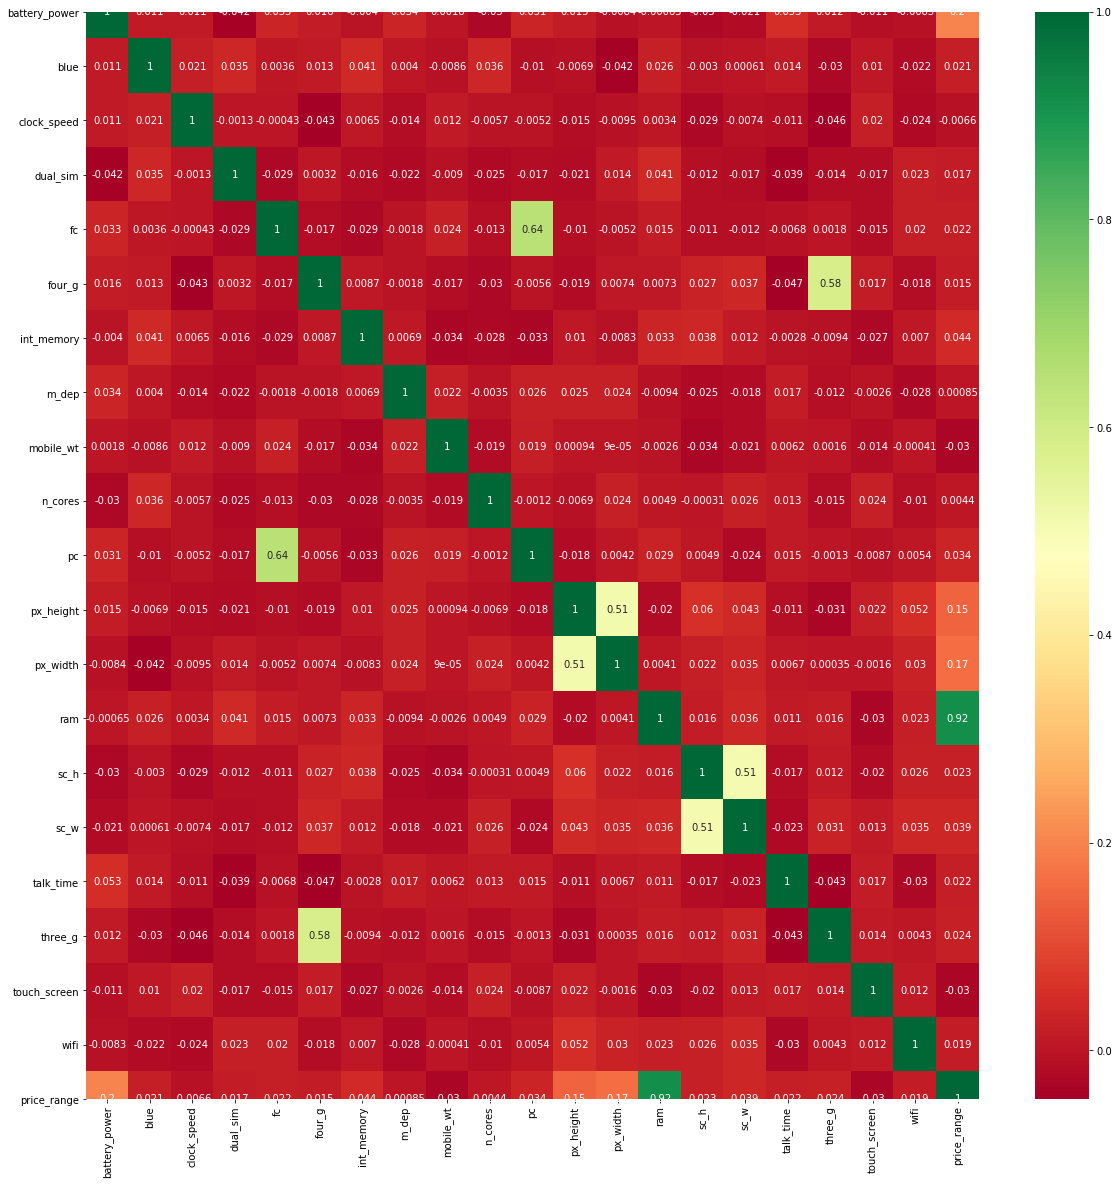

In [15]:
import seaborn as sns 
# get correlations of each features in dataset 

corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

# plot heat map 
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")